In [30]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import *

In [48]:
puma = rtb.models.DH.Puma560()                  # instantiate robot model
puma

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴──

In [31]:
TE1 = SE3.Trans(0.4, -0.2, 0.1) * SE3.Rx(3)
TE1

   1         0         0         0.4       
   0        -0.99     -0.1411   -0.2       
   0         0.1411   -0.99      0.1       
   0         0         0         1         


In [32]:
TE2 = SE3.Trans(0.4, 0.2, 0.1) * SE3.Rx(1)
TE2

   1         0         0         0.4       
   0         0.5403   -0.8415    0.2       
   0         0.8415    0.5403    0.1       
   0         0         0         1         


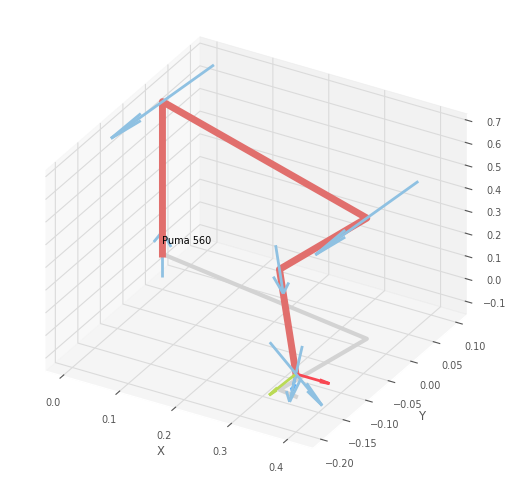

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [33]:
sol1 = puma.ikine_a(TE1, "ru")
puma.plot(sol1.q)

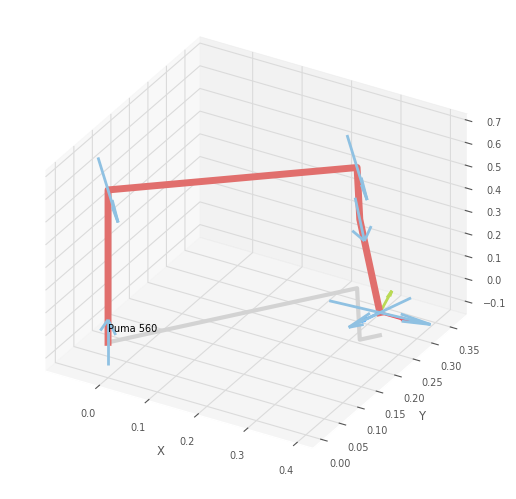

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [34]:
sol2 = puma.ikine_a(TE2, "ru")
puma.plot(sol2.q)

In [35]:
t = np.arange(0, 2, 0.02)

In [42]:
traj = rtb.jtraj(sol1.q, sol2.q, t)

In [47]:
puma.plot(traj.q)

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

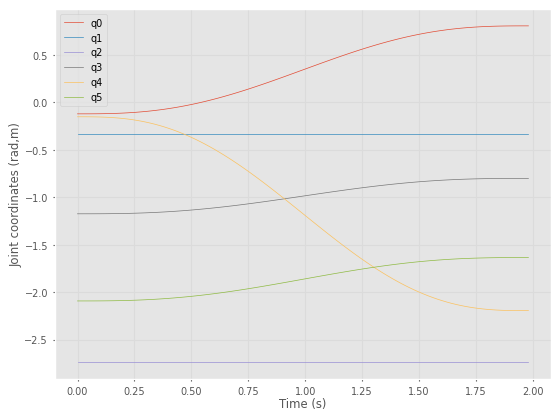

[<Axes: xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [44]:
rtb.xplot(t, traj.q)